# Question (1) 

# part (a)

#### - importing the necessary libraries for question part (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gaussian_kde

#### - defining the probability density function (PDF) for the Metropolis-Hastings Algorithm for f(x) over the real numbers x.

In [2]:
def f(x):
    return 0.5 * np.exp(-np.abs(x))

## Applying the random walk Metropolis algorithm steps

#### -  Stating the number of iterations as N

In [3]:
N = 10000 

#### - Standard deviation for the random walk metropolis as given in the question

In [4]:
s = 1 

#### - To obtain an array of 'N = 10000'samples taken from a standard normal distribution 

In [5]:
x = np.zeros(N) 

#### - Setting up an initial value as x for the random walk metropolis as mentioned in  the question 

In [6]:
x[0] = np.random.normal() 

#### - To generate a sequence of samples x from the target distribution f(x) and to repeat this process for N-1 iterations

In [7]:
for i in range(1, N):
    
    x_asteric_ = np.random.normal(x[i-1], s)
    # Stating a proposal for each iteration of the loop using the normal distribution 
    
    r = f(x_asteric_) / f(x[i-1])
    # Calculating the acceptance ratio, which is-
    # the ratio of the probability density function (PDF) of the proposed value x_asteric_ to the PDF of the current value.
    
    u = np.random.uniform()
    if u < r:
        x[i] = x_asteric_
    else:
        x[i] = x[i-1]
    #Then we decide whether to accept or reject the proposal in the context of the Metropolis-Hastings algorithm

## Constructing a histogram and a kernel density plot to provide the estimates of f(x)

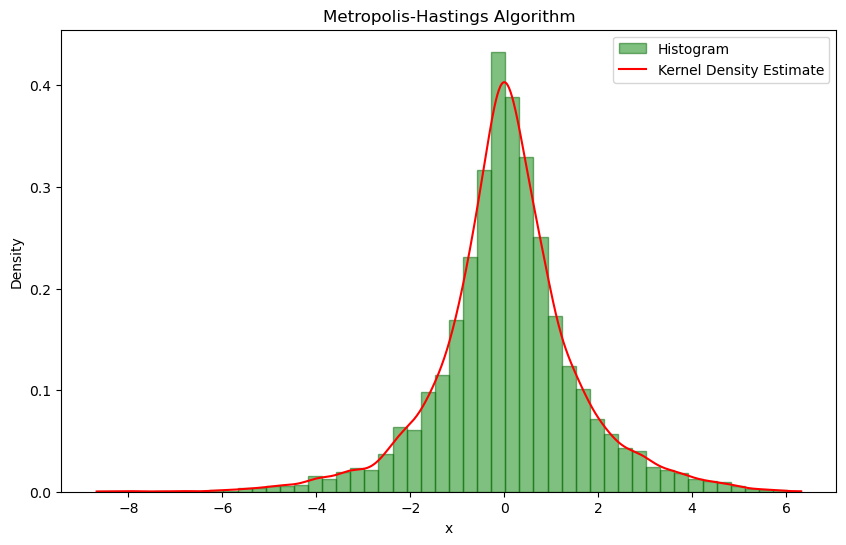

In [8]:
plt.figure(figsize=(10, 6))

plt.hist(x, bins=50, density=True, alpha=0.5, color='green', label='Histogram', edgecolor='darkgreen')
# Creating the Histogram 

x_values_range = np.linspace(np.min(x), np.max(x), 1000)
# Defing the range of x values for the graph

kde = gaussian_kde(x) 
plt.plot(x_values_range, kde(x_values_range), color='red', label='Kernel Density Estimate')
# plotting the Kernel Density Estimate line
#and we try to control the smoothness of the estimated density function
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings Algorithm')
plt.legend()
plt.show()

## Adding the line of f(x) density function to the graph 

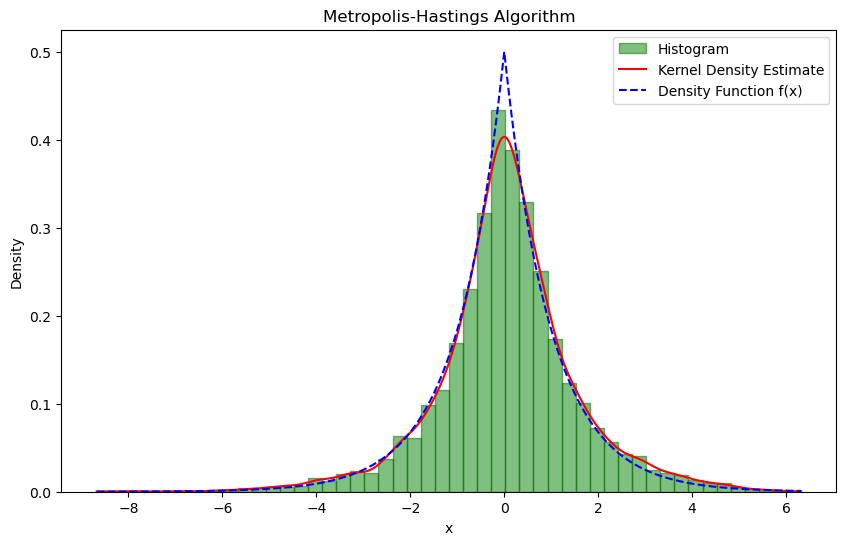

In [9]:
plt.figure(figsize=(10, 6))

plt.hist(x, bins=50, density=True, alpha=0.5, color='green', label='Histogram', edgecolor='darkgreen')
# Creating the Histogram

x_values_range = np.linspace(np.min(x), np.max(x), 1000)
# Defing the range of x values for the graph

kde = gaussian_kde(x) 
plt.plot(x_values_range, kde(x_values_range), color='red', label='Kernel Density Estimate')
# plotting the Kernel Density Estimate line
#and we try to control the smoothness of the estimated density function

plt.plot(x_values_range, f(x_values_range), color='blue', linestyle='--', label='Density Function f(x)')
# plotting the density function f(x) which is the true density function

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings Algorithm')
plt.legend()
plt.show()

### To avoid numerical errors ----------->

- using the equivalent criterion given in the question as a practical tip :
- log u < log r (x∗, xi−1) = log f (x∗) − log f (xi−1) instead of u < r (x∗, xi−1).

## Re-constructing the entire plot by trying to avoid numerical errors

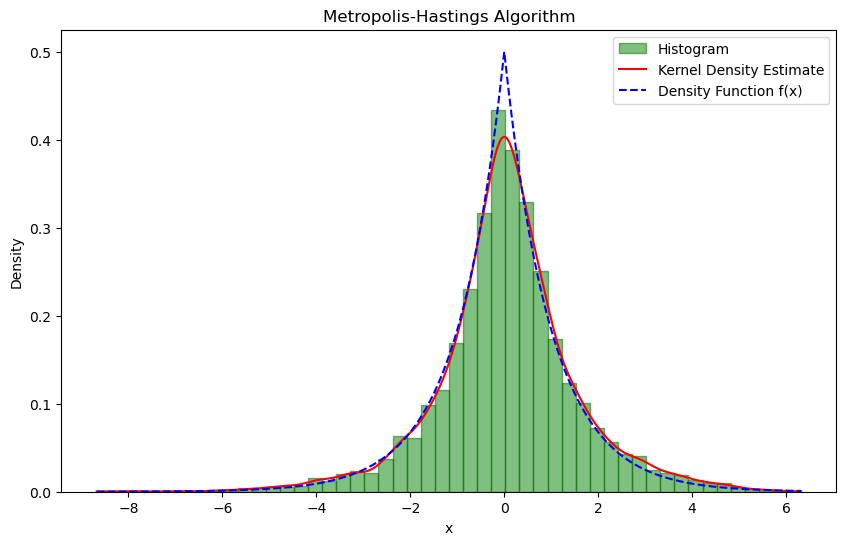

In [10]:
plt.figure(figsize=(10, 6))

plt.hist(x, bins=50, density=True, alpha=0.5, color='green', label='Histogram', edgecolor='darkgreen')
# Creating the Histogram 

x_values_range = np.linspace(np.min(x), np.max(x), 1000) 
# Defing the range of x values for the graph

log_kde_values = np.log(kde(x_values_range))
log_f_values = np.log(f(x_values_range))
#as recommended by the practical tip provided in the question
# To compare the logarithms of the densities when plotting we need to include the logarithms of the densities on the scale

plt.plot(x_values_range, np.exp(log_kde_values), color='red', label='Kernel Density Estimate')
# After computing the logarithm densities we have to plot the Kernel Density Estimate line 

plt.plot(x_values_range, np.exp(log_f_values), color='blue', linestyle='--', label='Density Function f(x)')
# plotting the density function f(x) which is the true density function with logarithm densities
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings Algorithm')
plt.legend()
plt.show()

## Evaluating the Monte Carlo estimates of the mean and standard deviation

#### - Calculating the Sample Mean and Sample Standard Deviation

In [11]:
sample_mean_ = np.mean(x)
sample_standard_dev_ = np.std(x)

#### - Stating the Monte Carlo Estimates

In [12]:
print("Sample mean:", sample_mean_)
print("Sample standard deviation:", sample_standard_dev_) 

Sample mean: 0.05717156734101784
Sample standard deviation: 1.4864151324530412


# Part (b)

# Calculating the R^ for the random walk Metropolis algorithm

#### - importing the neccessary libraries for part b)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#### - Defining the f(x) function thas used in part a) once again

In [14]:
def f_x(x):
    return 0.5 * np.exp(-np.abs(x))

#### - Defining the sample mean and sample variance of chain j  

In [15]:
def compute_M(x):
    return np.mean(x)

def compute_V(x, M):
    return np.mean((x - M)**2)

#### - Generating multiple sequences of N samples

In [16]:
J = 4
N = 2000
s_values = np.linspace(0.001, 1, 100)
R_hat_values = []

for s in s_values:
    chains = [np.zeros(N) for _ in range(J)]
    for j in range(J):
        chains[j][0] = 0 
        for i in range(1, N):
            x_asteric = np.random.normal(loc=chains[j][i-1], scale=s)
            r_ratio = f_x(x_asteric) / f_x(chains[j][i-1])
            u = np.random.uniform()
            if u < r_ratio:
                chains[j][i] = x_asteric
            else:
                chains[j][i] = chains[j][i-1]
                # Generating j number of chains
    
    Mj = np.array([compute_M(chain) for chain in chains])
    Vj = np.array([compute_V(chain, M) for chain, M in zip(chains, Mj)])
    M = np.mean(Mj)
    B = np.mean((Mj - M)**2)
    W = np.mean(Vj)
    R_hat = np.sqrt((B + W) / W)
    R_hat_values.append(R_hat)
    # Computing the Mj, Vj, M, B, W and R^

#### - Plotting R^ values over s values

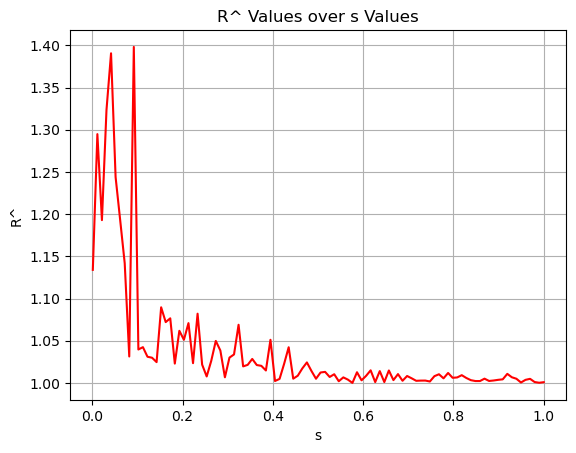

In [17]:
plt.plot(s_values, R_hat_values, color='red')
plt.title('R^ Values over s Values')
plt.xlabel('s')
plt.ylabel('R^')
plt.grid(True)
plt.show()